In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('yield.csv')

In [3]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [8]:
df.duplicated().sum()

2310

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(25932, 7)

In [12]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [13]:
df.dropna(inplace=True)

In [14]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                                   Year  hg/ha_yield  \
Year                           1.000000     0.091327   
hg/ha_yield                    0.091327     1.000000   
average_rain_fall_mm_per_year -0.006423    -0.004067   
pesticides_tonnes              0.135127     0.065523   
avg_temp                       0.013701    -0.110400   

                               average_rain_fall_mm_per_year  \
Year                                               -0.006423   
hg/ha_yield                                        -0.004067   
average_rain_fall_mm_per_year                       1.000000   
pesticides_tonnes                                   0.161483   
avg_temp                                            0.333694   

                               pesticides_tonnes  avg_temp  
Year                                    0.135127  0.013701  
hg/ha_yield                             0.065523 -0.110400  
average_rain_fall_mm_per_year           0.161483  0.333694  
pesticides_tonnes                 

In [15]:
len(df['Area'].unique())

101

In [16]:
len(df['Item'].unique())

10

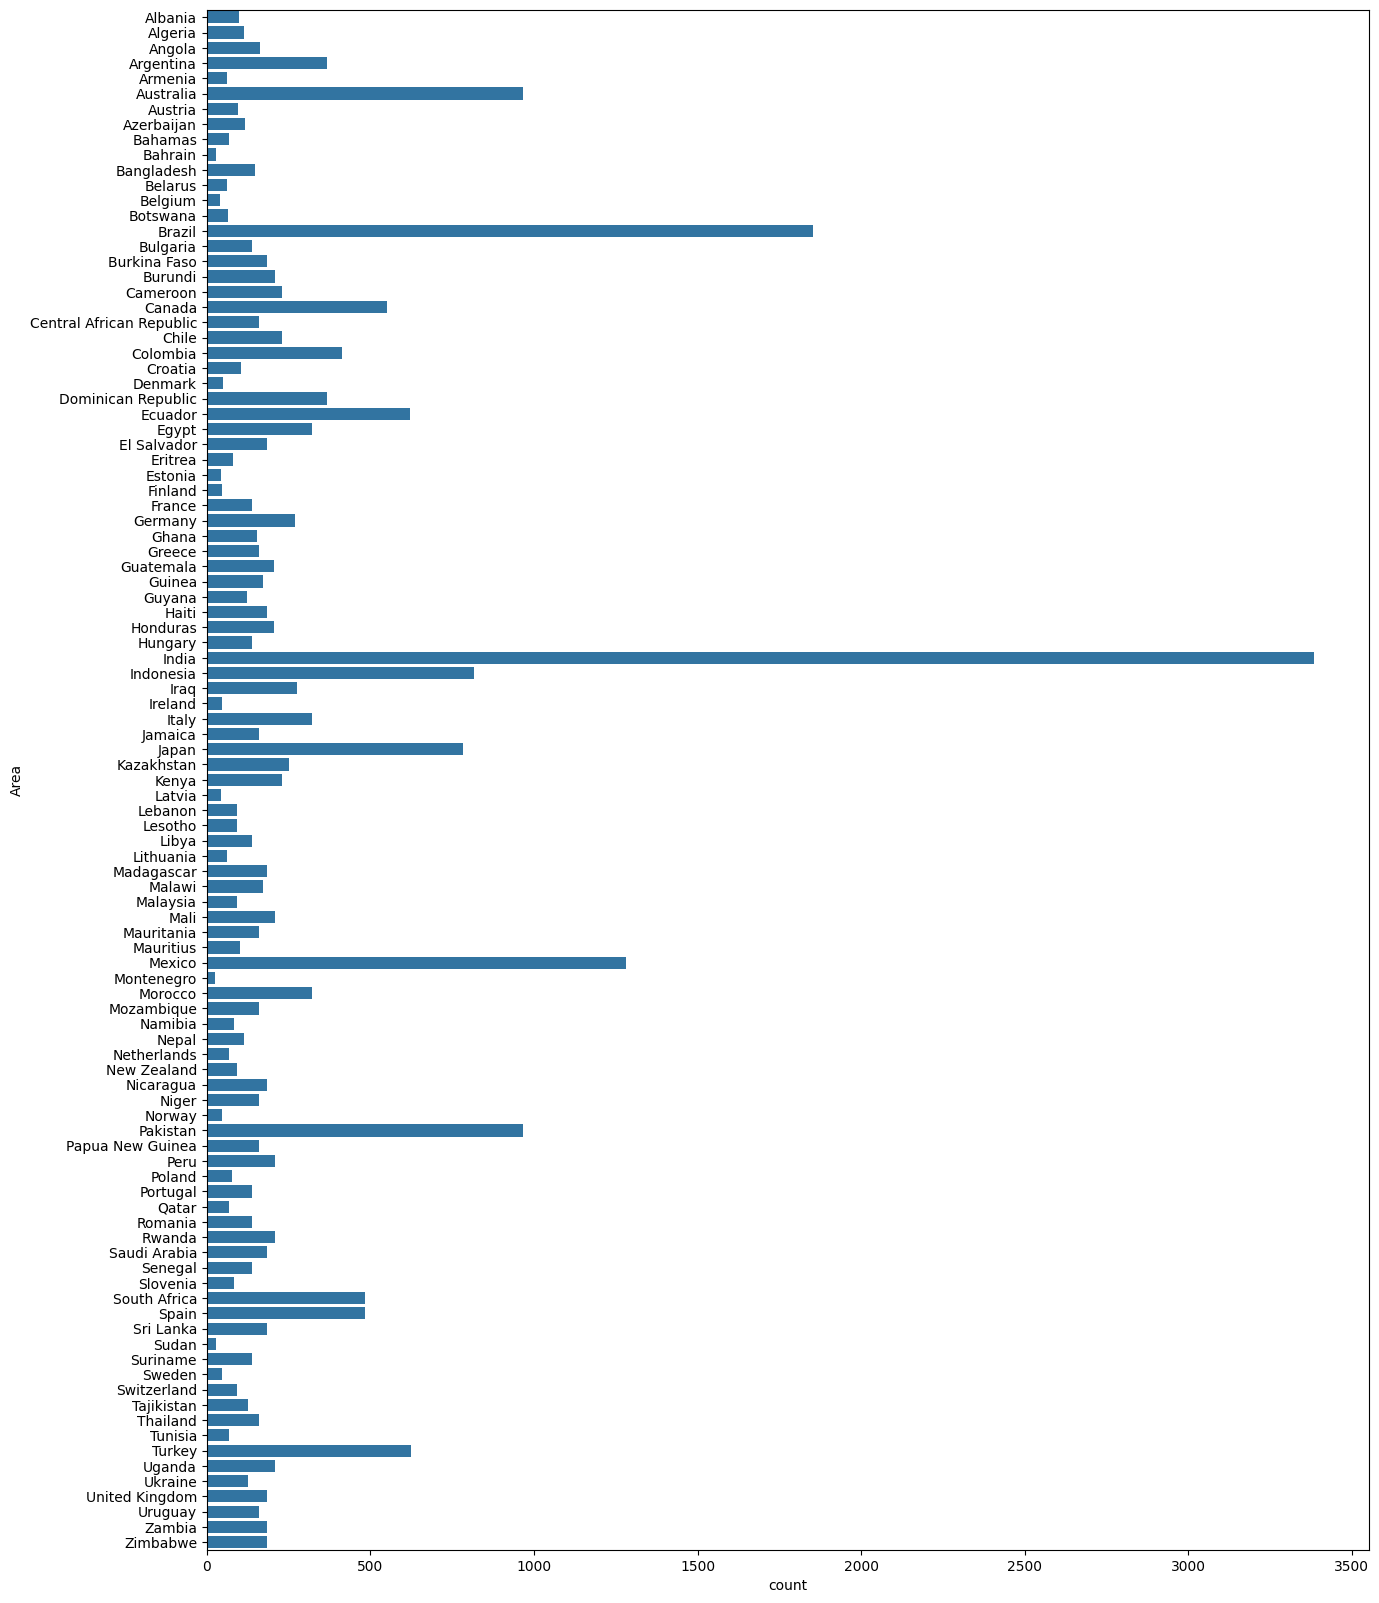

In [17]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Area'])
plt.show()

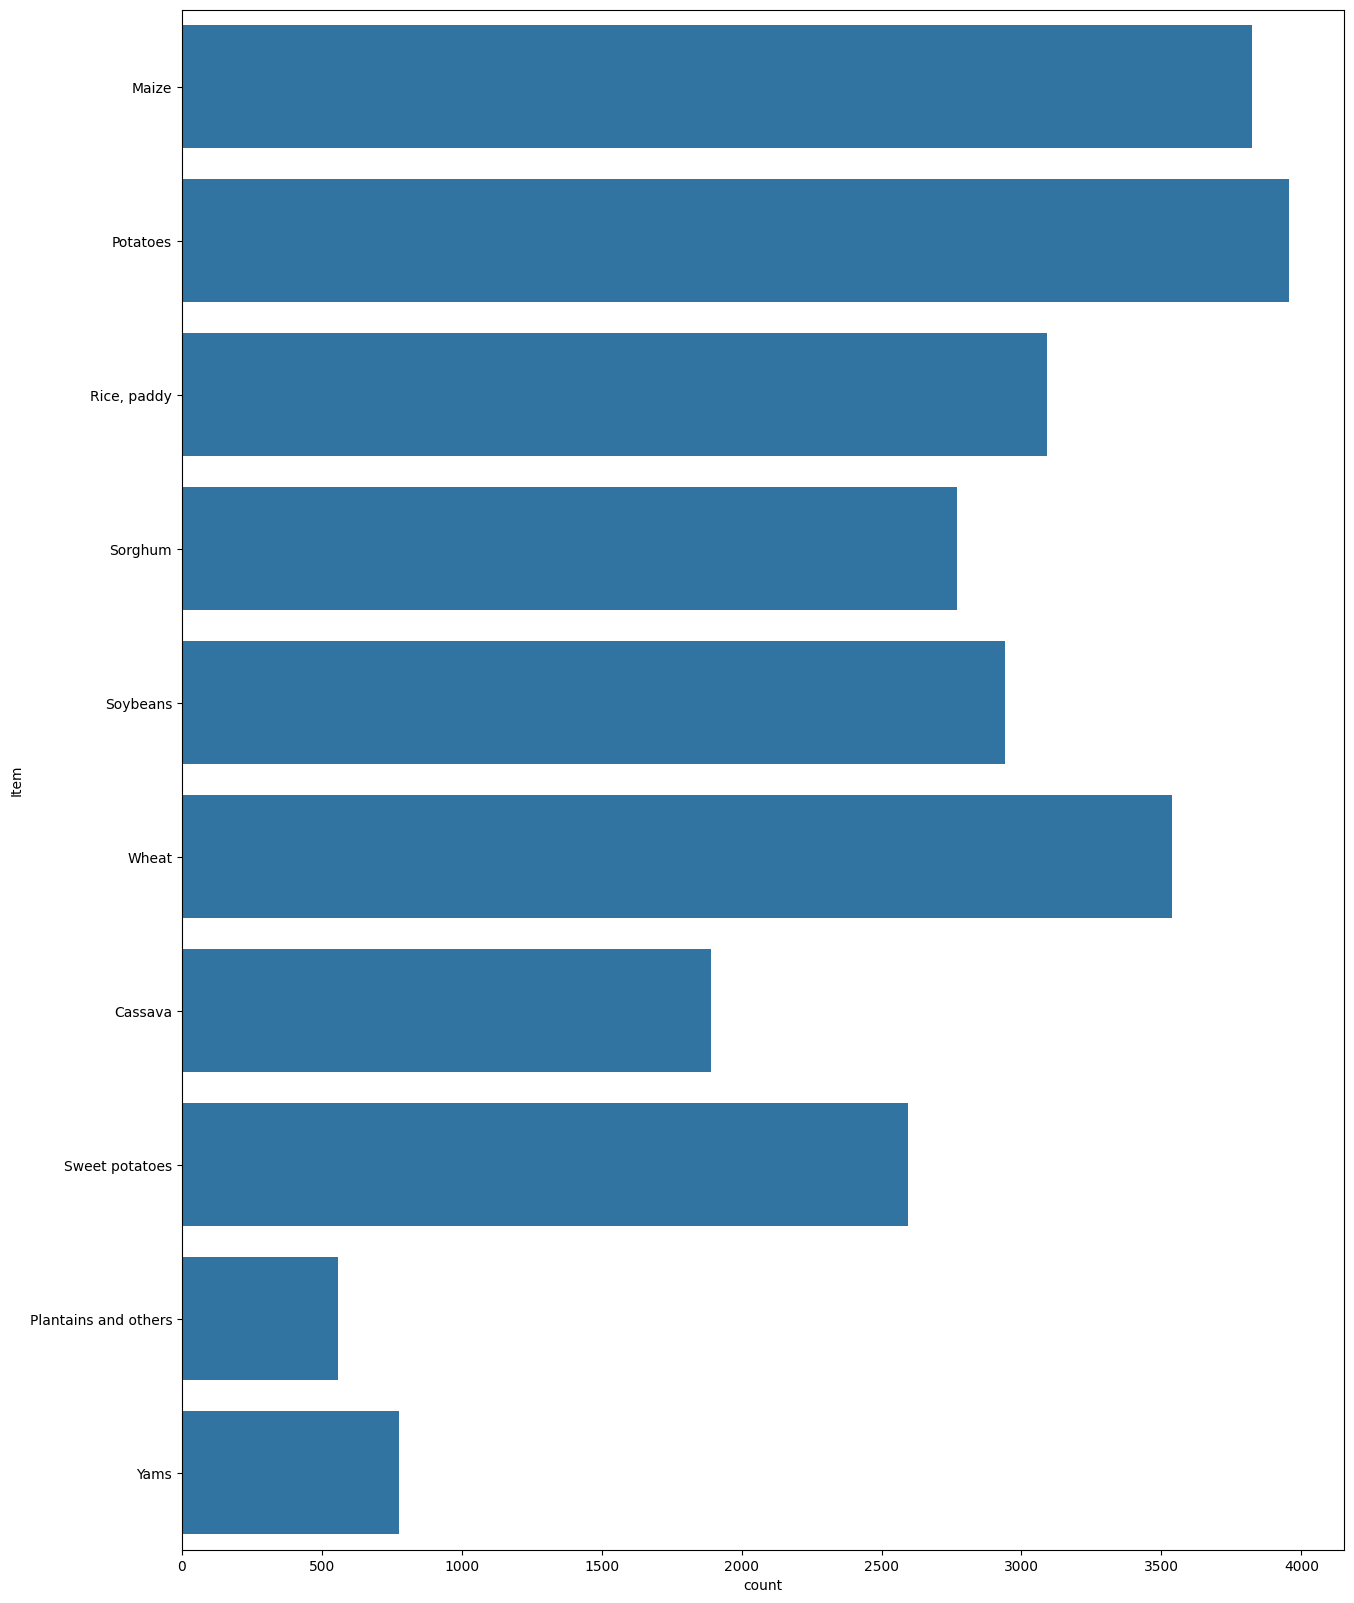

In [18]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Item'])
plt.show()

In [19]:
(df['Area'].value_counts() <400).sum()

88

In [20]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [21]:
df['hg/ha_yield'].sum()

1996196943

In [22]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

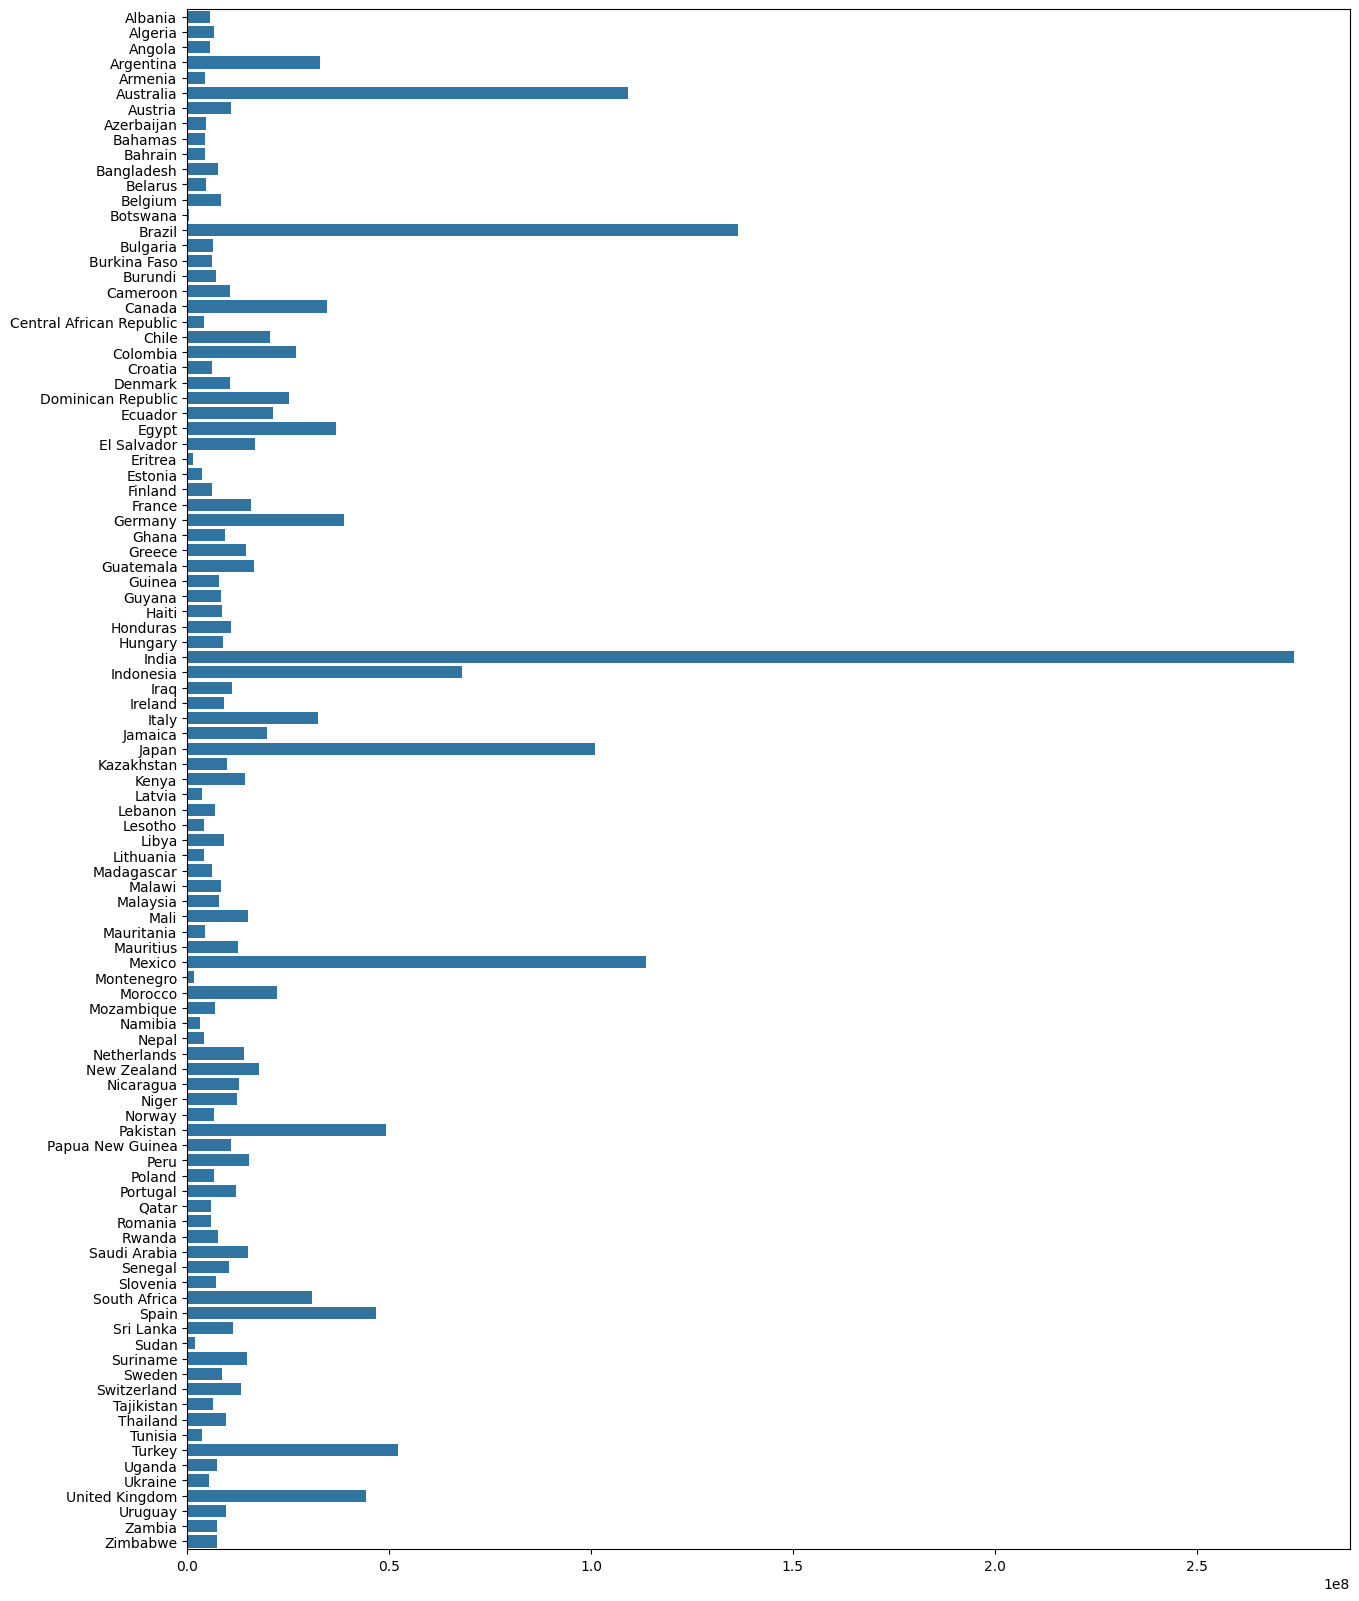

In [23]:
plt.figure(figsize=(15,20))
sns.barplot(y = country, x = yield_per_country)
plt.show()

In [24]:
crops = df['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

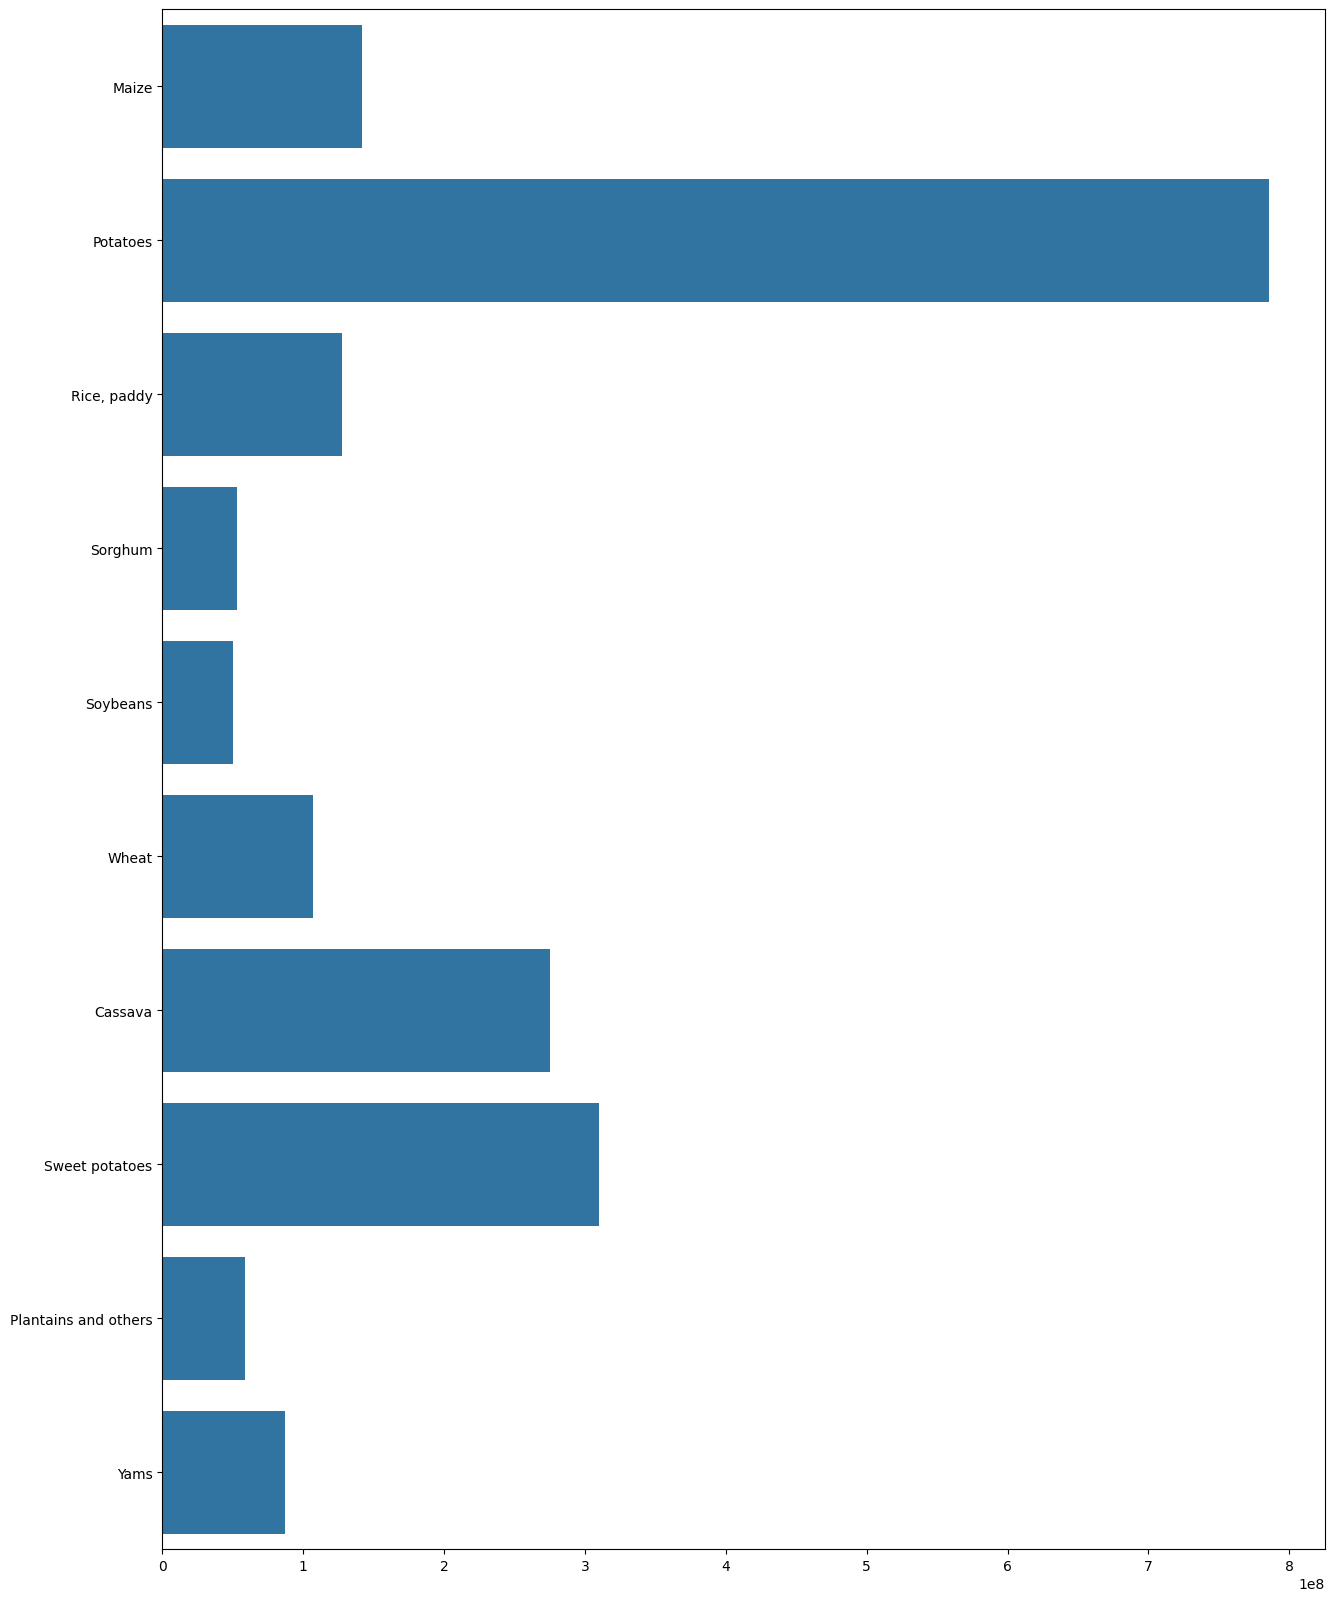

In [25]:
plt.figure(figsize=(15,20))
sns.barplot(y = crops, x = yield_per_crop)
plt.show()

In [26]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [27]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [28]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [29]:
df = df[col]

In [30]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [31]:
X = df.drop(columns=['hg/ha_yield'])
y = df['hg/ha_yield']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

In [33]:
X_train = train_data.drop(columns=['hg/ha_yield'])
y_train = train_data['hg/ha_yield']
X_test = test_data.drop(columns=['hg/ha_yield'])
y_test = test_data['hg/ha_yield']

In [34]:
numeric_features = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']
categorical_features = ['Area', 'Item']

In [35]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [36]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Area', 'Item'])
    ])

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor


In [39]:
def create_custom_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [40]:
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)


In [63]:
models = {
    'Linear Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Random Forest Regressor': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    'Gradient Boosting Regressor': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ]),
    'Support Vector Regressor': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', SVR())
    ]),
    'K-Nearest Neighbors Regressor': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', KNeighborsRegressor(n_neighbors=5))
    ]),
    'Decision Tree Regressor': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),
    'Custom Neural Network': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', KerasRegressor(build_fn=create_custom_model, epochs=300, batch_size=32, verbose=0, input_shape=X_train_processed.shape[1]))
    ])
}


In [64]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} Mean Absolute Error: {mae}')
    print(f'{name} R^2 Score: {r2}')
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{name}: True vs. Predicted Values')
    plt.show()

Linear Regression Mean Absolute Error: 30302.947852281366
Linear Regression R^2 Score: 0.7406279960537032


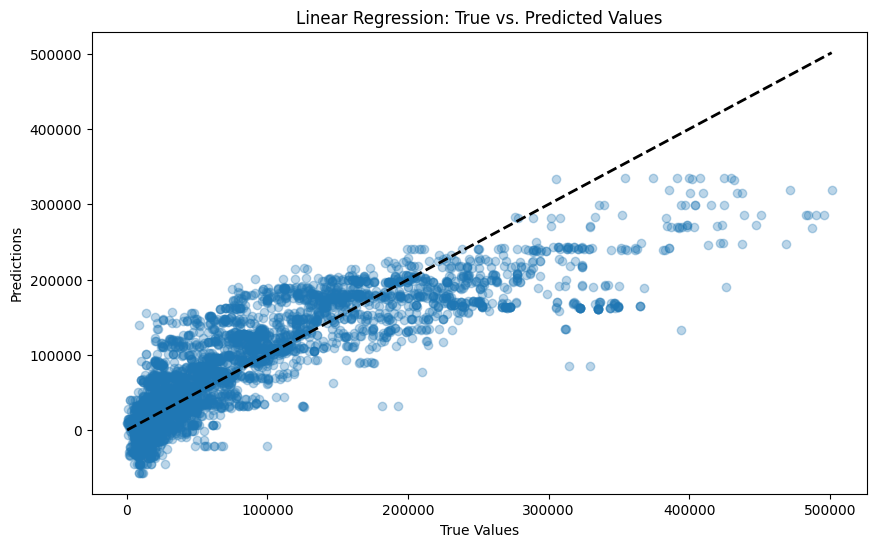

Random Forest Regressor Mean Absolute Error: 6298.842178169019
Random Forest Regressor R^2 Score: 0.9667214582452321


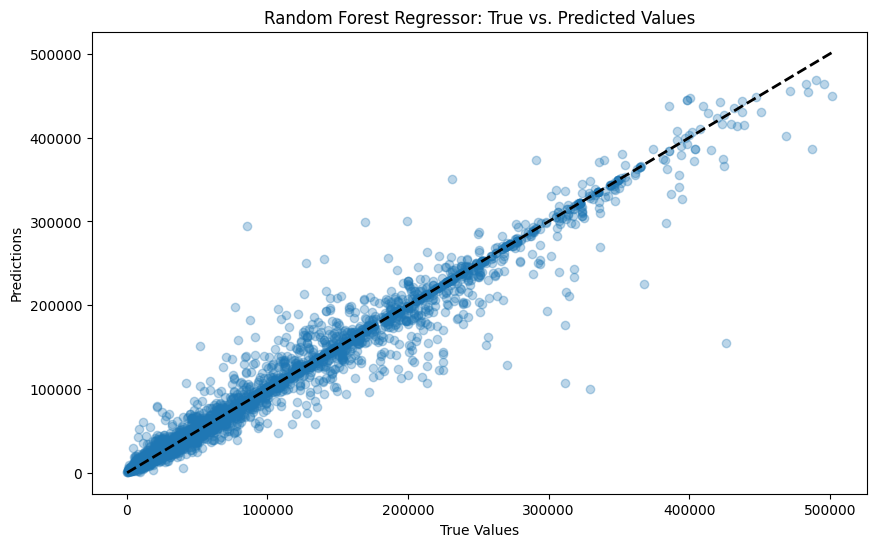

Gradient Boosting Regressor Mean Absolute Error: 21127.764911706137
Gradient Boosting Regressor R^2 Score: 0.8503971782540043


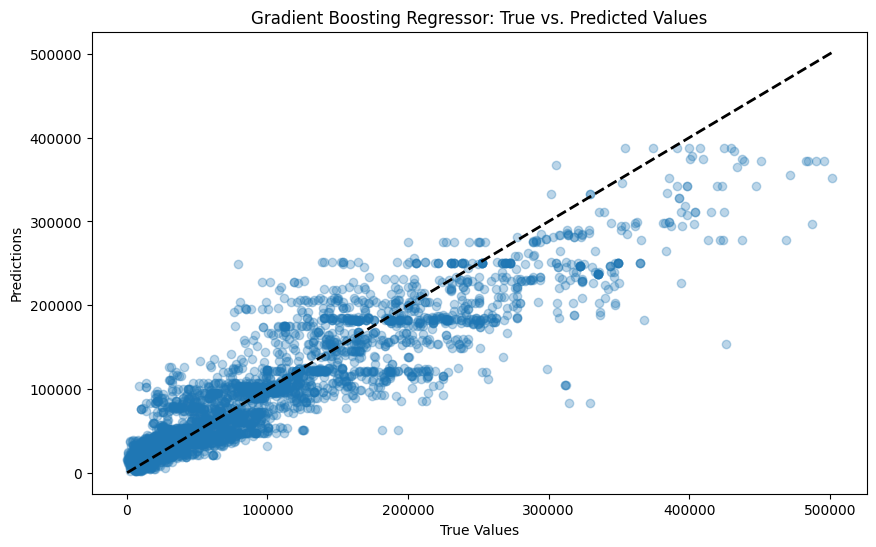

Support Vector Regressor Mean Absolute Error: 57922.34364257103
Support Vector Regressor R^2 Score: -0.20892902000684854


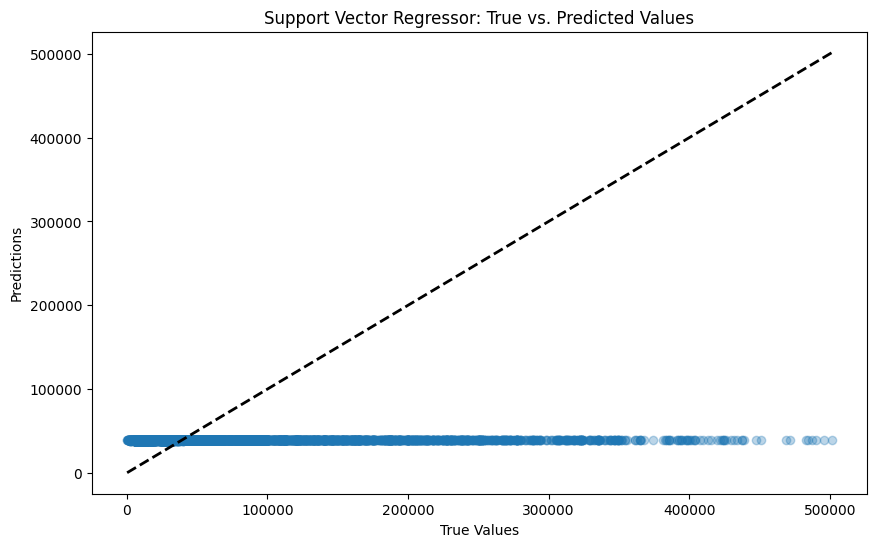

K-Nearest Neighbors Regressor Mean Absolute Error: 8712.634702139965
K-Nearest Neighbors Regressor R^2 Score: 0.9536008807357773


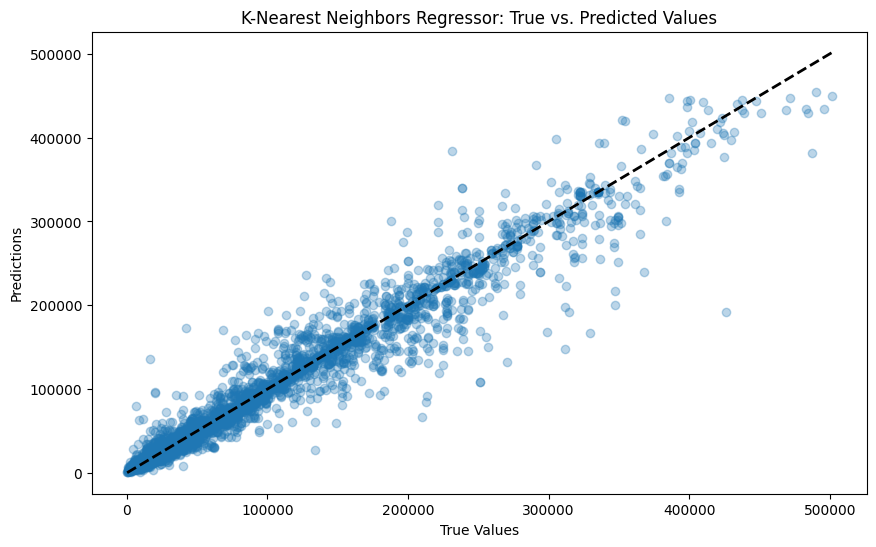

Decision Tree Regressor Mean Absolute Error: 6815.286967418547
Decision Tree Regressor R^2 Score: 0.9522596467801899


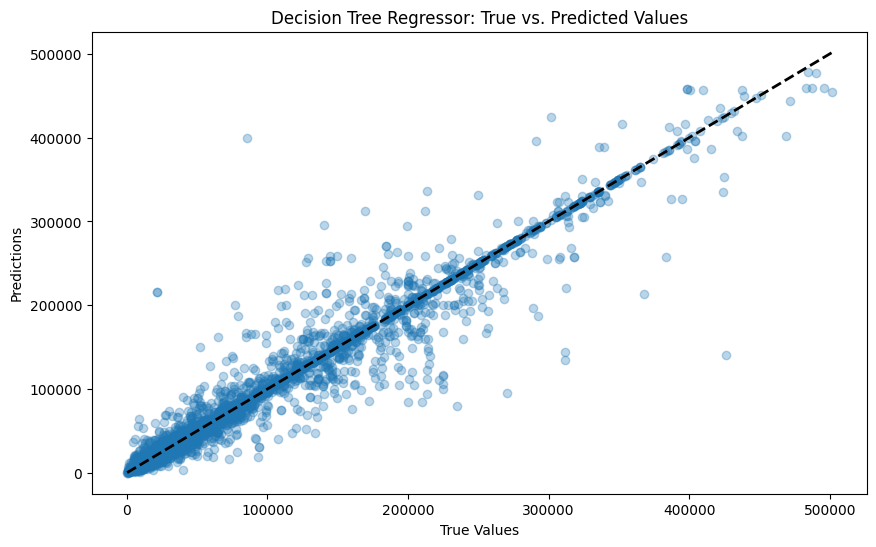

C:\Users\dhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Custom Neural Network Mean Absolute Error: 10462.079406891251
Custom Neural Network R^2 Score: 0.9449546337127686


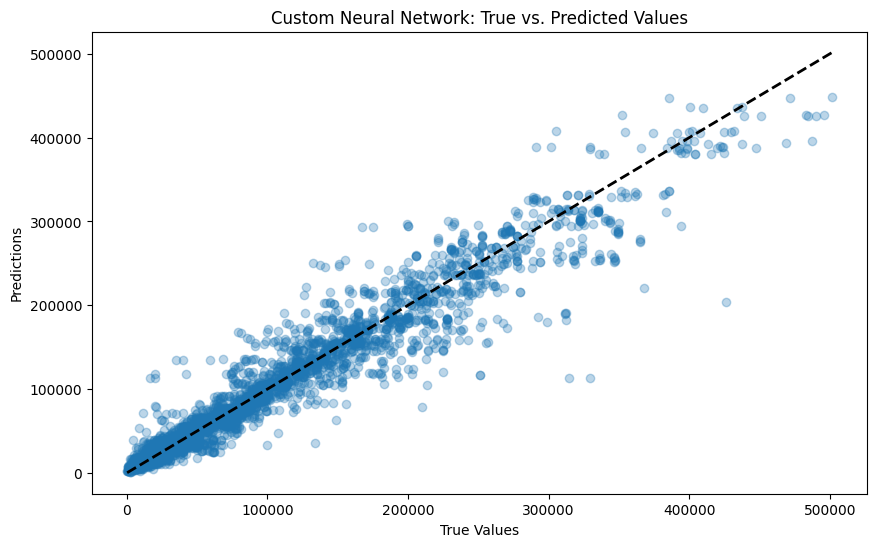

In [65]:
for name, model in models.items():
    evaluate_model(name, model, X_train, X_test, y_train, y_test)

In [66]:
def predict_yield(model_name, year, rainfall, pesticide, avg_temp, area, item):
    model = models.get(model_name)
    if model is None:
        print(f"Model {model_name} not found.")
        return

    

    input_data = pd.DataFrame({
        'Year': [year],
        'average_rain_fall_mm_per_year': [rainfall],
        'pesticides_tonnes': [pesticide],
        'avg_temp': [avg_temp],
        'Area': [area],
        'Item': [item]
    })

    yield_prediction = model.predict(input_data)
    return yield_prediction[0]

In [67]:
def compare_models(user_model_name, year, rainfall, pesticide, avg_temp, area, item):
    custom_model_name = 'Custom Neural Network'
    user_prediction = predict_yield(user_model_name, year, rainfall, pesticide, avg_temp, area, item)
    custom_prediction = predict_yield(custom_model_name, year, rainfall, pesticide, avg_temp, area, item)

    if user_prediction is None or custom_prediction is None:
        return
    
    predictions = {
        'Model': [user_model_name, custom_model_name],
        'Predicted Yield': [user_prediction, custom_prediction]
    }

    df_predictions = pd.DataFrame(predictions)
    df_predictions.set_index('Model', inplace=True)

    # Plot the predictions
    df_predictions.plot(kind='bar', figsize=(10, 6))
    plt.title('Model Comparison: Predicted Yield')
    plt.ylabel('Yield')
    plt.show()

    # Print the predictions
    print(f"{user_model_name} predicted yield: {user_prediction}")
    print(f"{custom_model_name} predicted yield: {custom_prediction}")

In [68]:
chosen_model_name = 'Decision Tree Regressor'
year = 2024
rainfall = 1200
pesticide = 500
avg_temp = 25
area = 'Albania'
item = 'Rice, paddy'

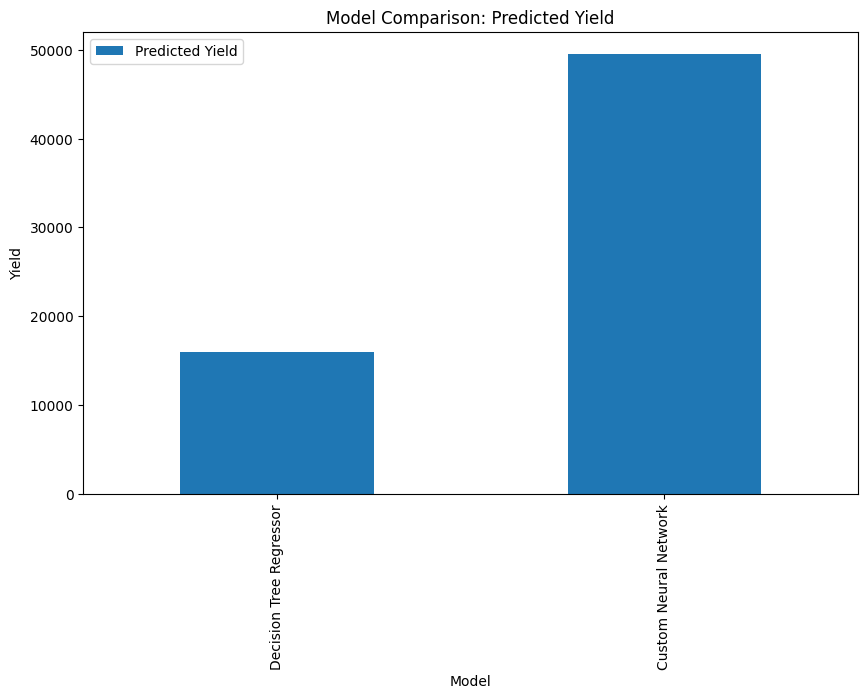

Decision Tree Regressor predicted yield: 16000.0
Custom Neural Network predicted yield: 49542.17578125


In [69]:
compare_models(chosen_model_name, year, rainfall, pesticide, avg_temp, area, item)

In [70]:
def compare_models(user_model_name, year, rainfall, pesticide, avg_temp, area, item):
    custom_model_name = 'Custom Neural Network'
    user_prediction = predict_yield(user_model_name, year, rainfall, pesticide, avg_temp, area, item)
    custom_prediction = predict_yield(custom_model_name, year, rainfall, pesticide, avg_temp, area, item)

    if user_prediction is None or custom_prediction is None:
        return
    
    predictions = {
        'Model': [user_model_name, custom_model_name],
        'Predicted Yield': [user_prediction, custom_prediction]
    }

    df_predictions = pd.DataFrame(predictions)
    df_predictions.set_index('Model', inplace=True)

    # Plot the predictions
    df_predictions.plot(kind='bar', figsize=(10, 6))
    plt.title('Model Comparison: Predicted Yield')
    plt.ylabel('Yield')
    plt.show()

    # Print the predictions
    print(f"{user_model_name} predicted yield: {user_prediction}")
    print(f"{custom_model_name} predicted yield: {custom_prediction}")

# Example usage for comparison
chosen_model_name = 'Random Forest Regressor'
year = 2024
rainfall = 1200
pesticide = 500
avg_temp = 25
area = 'Asia'
item = 'Rice'


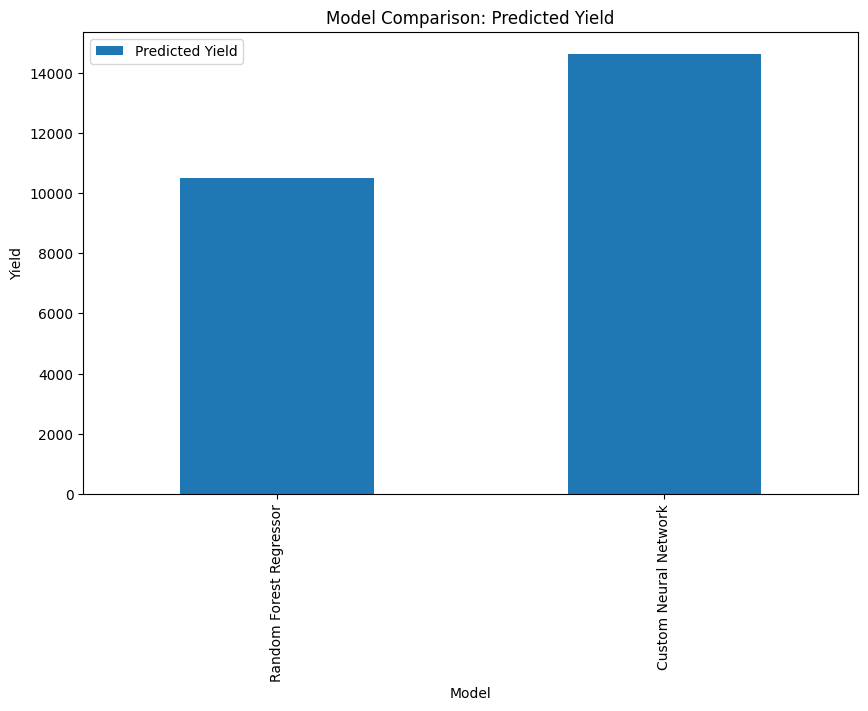

Random Forest Regressor predicted yield: 10507.02
Custom Neural Network predicted yield: 14629.0224609375


In [71]:
compare_models(chosen_model_name, year, rainfall, pesticide, avg_temp, area, item)

In [72]:
def plot_performance(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'mae': mae, 'r2': r2}
    
    metrics_df = pd.DataFrame(results).T[['mae', 'r2']]
    metrics_df.plot(kind='bar', figsize=(14, 7))
    plt.title('Model Performance Comparison')
    plt.ylabel('Score')
    plt.xlabel('Model')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
plot_performance(models, X_train, X_test, y_train, y_test)

C:\Users\dhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\dhanu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
def interactive_prediction(models, preprocessor):
    # List available models with integer values
    print("Available models:")
    model_mapping = {i: name for i, name in enumerate(models.keys(), 1)}
    for i, name in model_mapping.items():
        print(f"{i}: {name}")
    
    # Prompt user for model selection by integer value
    model_choice = int(input("Enter the model number: "))
    chosen_model_name = model_mapping.get(model_choice)
    if chosen_model_name is None:
        print(f"Model number {model_choice} is not valid.")
        return

    Year = int(input("Enter Year: "))
    average_rain_fall_mm_per_year = float(input("Enter Average Rainfall (mm per year): "))
    pesticides_tonnes = float(input("Enter Pesticides Used (tonnes): "))
    avg_temp = float(input("Enter Average Temperature (°C): "))
    Area = input("Enter Area: ")
    Item = input("Enter Crop Item: ")
    compare_models(chosen_model_name, year, rainfall, pesticide, avg_temp, area, item)

Available models:
1: Linear Regression
2: Random Forest Regressor
3: Gradient Boosting Regressor
4: Support Vector Regressor
5: K-Nearest Neighbors Regressor
6: Decision Tree Regressor
7: Custom Neural Network


Enter the model number:  6
Enter Year:  2025
Enter Average Rainfall (mm per year):  17654
Enter Pesticides Used (tonnes):  198
Enter Average Temperature (°C):  17
Enter Area:  India
Enter Crop Item:  Rice, paddy


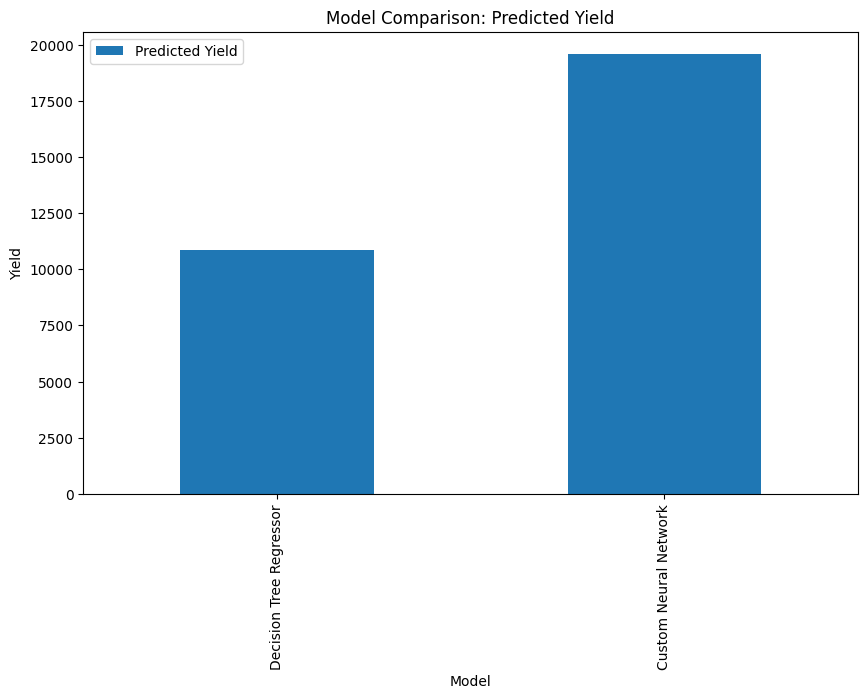

Decision Tree Regressor predicted yield: 10847.0
Custom Neural Network predicted yield: 19592.642578125


In [55]:
interactive_prediction(models, preprocessor)